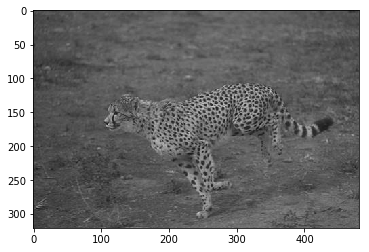

In [3]:
im = Image.open('input1.jpg').convert('L')
plt.imshow(im)

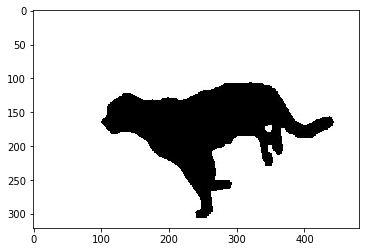

In [4]:
out = Image.open('out1.jpg').convert('L')
plt.imshow(out)


iteration 0

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5

iteration 6

iteration 7

iteration 8

iteration 9
flag 0

************Calculation of Tpr, Fpr, F-Score********************

TPR is: 0.5596533341646662

FPR is: 0.3693710956961637

Fscore: 0.6846877771103292


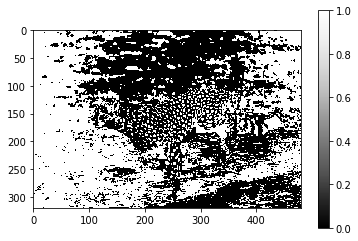

In [2]:
import math 
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random

im = Image.open('input1.jpg').convert('L')
arr = np.asarray(im)

out = Image.open('out1.jpg').convert('L')
arr_out = np.asarray(out)

rows,columns = np.shape(arr)

rand_points = [ random.randint(0, 255) for i in range(2) ]

'''finding the histogram of the image to obtain total number of pixels in each level'''

hist,bins = np.histogram(arr,256,[0,256])

#print hist,bins

centroid1_avg = 0
centroid2_avg = 0
def kmeans(histogram):
	for k in range(0,10):
		print('\niteration',k)
		''' First iteration assign random centroid points '''
		if k == 0:
			cent1 = rand_points[0]
			cent2 =	rand_points[1]
		else:
			#print '\n selecting centroid values'
			cent1 = centroid1_avg
			cent2 = centroid2_avg

		#print histogram
		point1_centroid = []
		point2_centroid = []
		w1_centroid = []
		w2_centroid = []
		sum1 = 0
		sum2 = 0
		for i,val in enumerate(histogram):
			''' computing absolute distance from each of the cluster and assigning it to a particular cluster based on distance'''
			#print '\n\n','i',i,'val',val,'cent1', cent1,'cent2', cent2 
			if  abs(i - cent1) <  abs(i - cent2):
				point1_centroid.append(i)
				w1_centroid.append(val)
				sum1 = sum1 + (i * val)
				#print '\nselection 1'
			else:
				point2_centroid.append(i)
				w2_centroid.append(val)
				sum2 = sum2 + (i * val)
				#print '\nselection 2'
		
		
		centroid1_avg = int(sum1)/sum(w1_centroid)	
		centroid2_avg = int(sum2)/sum(w2_centroid)			
		#print '\n\n','sum1',sum1,'sum2',sum2,'cent1', centroid1_avg,'cent2', centroid2_avg
	return [point1_centroid,point2_centroid] 

res = kmeans(hist)
#print res

end = np.zeros((rows,columns))

if len(res[1]) > len(res[0]):
	'''bacground is res1'''
	print ('flag 1')
	flag = 1
else:
	print ('flag 0')
	flag = 0


for i in range(rows):
	for j in range(columns):
		if flag == 1:
			if (arr[i][j] in res[1]):
				end[i][j] = int(0)

			else:
				end[i][j] = int(1)
		else:
			if (arr[i][j] in res[1]):
				end[i][j] = int(1)

			else:
				end[i][j] = int(0)

ground_out = np.zeros((rows,columns))

for i in range(rows):
	for j in range(columns):
		if arr_out[i][j] >125:
			ground_out[i][j] = int(1)

		else:
			ground_out[i][j] = int(0)



''' ********************************** Calculation of Tpr, Fpr, F-Score ***************************************************'''

tp = 0
tn = 0
fn = 0
fp = 0

for i in range(rows):
	for j in range(columns):
		if ground_out[i][j] == 1 and end[i][j] == 1:
			tp = tp + 1
		if ground_out[i][j] == 0 and end[i][j] == 0:
			tn = tn + 1
		if ground_out[i][j] == 1 and end[i][j] == 0:
			fn = fn + 1
		if ground_out[i][j] == 0 and end[i][j] == 1:
			fp = fp + 1


print ('\n************Calculation of Tpr, Fpr, F-Score********************')

#TP rate = TP/TP+FN
tpr= float(tp)/(tp+fn)
print ("\nTPR is:",tpr)

#fp rate is
fpr= float(fp)/(fp+tn)
print ("\nFPR is:",fpr)

#F-score as 2TP/(2TP + FP + FN)
fscore = float(2*tp)/((2*tp)+fp+fn)
print ("\nFscore:",fscore)



plt.imshow(end, cmap="Greys_r")
plt.colorbar()
plt.show()




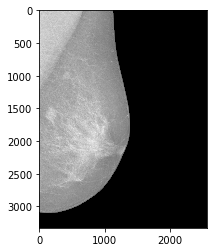

In [5]:
im = Image.open('input.png').convert('L')
plt.imshow(im)

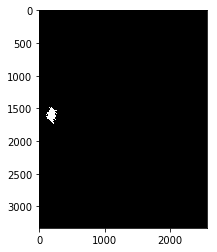

In [6]:
out = Image.open('out.png').convert('L')
plt.imshow(out)

In [45]:
from PIL import Image
import PIL.ImageOps    

image = Image.open('out.png')
if image.mode == 'RGBA':
    r,g,b,a = image.split()
    rgb_image = Image.merge('RGB', (r,g,b))

    inverted_image = PIL.ImageOps.invert(rgb_image)

    r2,g2,b2 = inverted_image.split()

    final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

    final_transparent_image.save('outnew.png')

else:
    inverted_image = PIL.ImageOps.invert(image)
    inverted_image.save('outnew.png')

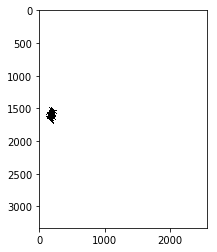

In [7]:
out = Image.open('outnew.png').convert('L')
plt.imshow(out)


iteration 0

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5

iteration 6

iteration 7

iteration 8

iteration 9
flag 1

************Calculation of Tpr, Fpr, F-Score********************

TPR is: 0.5732161509287402

FPR is: 0.0

Fscore: 0.7287188738691056


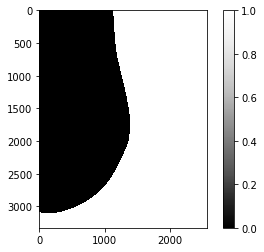

In [46]:
import math 
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random

im = Image.open('input.png').convert('L')
arr = np.asarray(im)

out = Image.open('outnew.png').convert('L')
arr_out = np.asarray(out)

rows,columns = np.shape(arr)

rand_points = [ random.randint(0, 255) for i in range(2) ]

'''finding the histogram of the image to obtain total number of pixels in each level'''

hist,bins = np.histogram(arr,256,[0,256])

#print hist,bins

centroid1_avg = 0
centroid2_avg = 0
def kmeans(histogram):
	for k in range(0,10):
		print('\niteration',k)
		''' First iteration assign random centroid points '''
		if k == 0:
			cent1 = rand_points[0]
			cent2 =	rand_points[1]
		else:
			#print '\n selecting centroid values'
			cent1 = centroid1_avg
			cent2 = centroid2_avg

		#print histogram
		point1_centroid = []
		point2_centroid = []
		w1_centroid = []
		w2_centroid = []
		sum1 = 0
		sum2 = 0
		for i,val in enumerate(histogram):
			''' computing absolute distance from each of the cluster and assigning it to a particular cluster based on distance'''
			#print '\n\n','i',i,'val',val,'cent1', cent1,'cent2', cent2 
			if  abs(i - cent1) <  abs(i - cent2):
				point1_centroid.append(i)
				w1_centroid.append(val)
				sum1 = sum1 + (i * val)
				#print '\nselection 1'
			else:
				point2_centroid.append(i)
				w2_centroid.append(val)
				sum2 = sum2 + (i * val)
				#print '\nselection 2'
		
		
		centroid1_avg = int(sum1)/sum(w1_centroid)	
		centroid2_avg = int(sum2)/sum(w2_centroid)			
		#print '\n\n','sum1',sum1,'sum2',sum2,'cent1', centroid1_avg,'cent2', centroid2_avg
	return [point1_centroid,point2_centroid] 

res = kmeans(hist)
#print res

end = np.zeros((rows,columns))

if len(res[1]) > len(res[0]):
	'''bacground is res1'''
	print ('flag 1')
	flag = 1
else:
	print ('flag 0')
	flag = 0


for i in range(rows):
	for j in range(columns):
		if flag == 1:
			if (arr[i][j] in res[1]):
				end[i][j] = int(0)

			else:
				end[i][j] = int(1)
		else:
			if (arr[i][j] in res[1]):
				end[i][j] = int(1)

			else:
				end[i][j] = int(0)

ground_out = np.zeros((rows,columns))

for i in range(rows):
	for j in range(columns):
		if arr_out[i][j] >125:
			ground_out[i][j] = int(1)

		else:
			ground_out[i][j] = int(0)



''' ********************************** Calculation of Tpr, Fpr, F-Score ***************************************************'''

tp = 0
tn = 0
fn = 0
fp = 0

for i in range(rows):
	for j in range(columns):
		if ground_out[i][j] == 1 and end[i][j] == 1:
			tp = tp + 1
		if ground_out[i][j] == 0 and end[i][j] == 0:
			tn = tn + 1
		if ground_out[i][j] == 1 and end[i][j] == 0:
			fn = fn + 1
		if ground_out[i][j] == 0 and end[i][j] == 1:
			fp = fp + 1


print ('\n************Calculation of Tpr, Fpr, F-Score********************')

#TP rate = TP/TP+FN
tpr= float(tp)/(tp+fn)
print ("\nTPR is:",tpr)

#fp rate is
fpr= float(fp)/(fp+tn)
print ("\nFPR is:",fpr)

#F-score as 2TP/(2TP + FP + FN)
fscore = float(2*tp)/((2*tp)+fp+fn)
print ("\nFscore:",fscore)



plt.imshow(end, cmap="Greys_r")
plt.colorbar()
plt.show()

